In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.metrics import accuracy_score, recall_score, precision_score

from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df['turnover'] = df[{'Attrition': {'Yes':1, 'No':0}}]
df['turnover'][df['turnover'] == 'Yes' ] = 1
df['turnover'][df['turnover'] == 'No' ] = 0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

0    1233
1     237
Name: turnover, dtype: int64


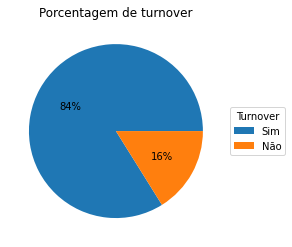

In [4]:
print(df["turnover"].value_counts())
plt.pie(df['turnover'].value_counts(), autopct='%.0f%%')
plt.legend({'Sim','Não'},
          title="Turnover",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Porcentagem de turnover")
plt.show()

Cerca de **237** funcionarios buscaram a rotatividade ('turnover'), esse numero representa **16%** de todos os funcionarios.

<AxesSubplot:xlabel='JobLevel', ylabel='YearsAtCompany'>

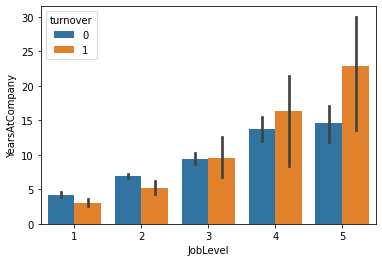

In [5]:
sns.barplot(x='JobLevel', y="YearsAtCompany", hue="turnover", data=df)

É notavel que quanto *maior o nivel de trabalho* ('jobLevel') *por anos de empresa* ('YearsAtCompany') **maior é a rotatividade dos funcionarios** ('turnover').

<AxesSubplot:xlabel='JobSatisfaction', ylabel='turnover'>

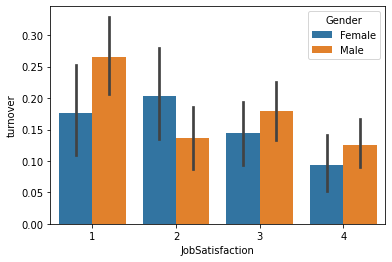

In [6]:
sns.barplot(x="JobSatisfaction", y="turnover", hue="Gender", data=df)


A maioria dos **homens que fazem turnover** tem uma *satisfação de trabalho baixa* (1 : low), já a maioria das **mulheres que também procuram o turnover** tem uma *satisfação de trabalho media* (2 : medium)

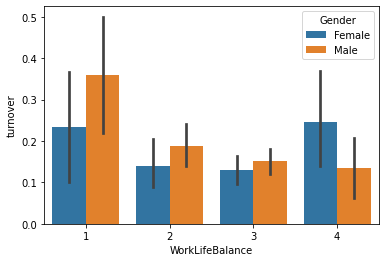

In [7]:
ax = sns.barplot(x="WorkLifeBalance", y="turnover", hue="Gender", data=df)


**Mulheres** com a *vida profissional e pessoal mais equilibradas* (4 : Best) possuem um **turnover superior aos homens**. Já o **turnover dos homens** se destaca na *falta de equilibrio entre vida profissional e pessoal* (1 : Bad)

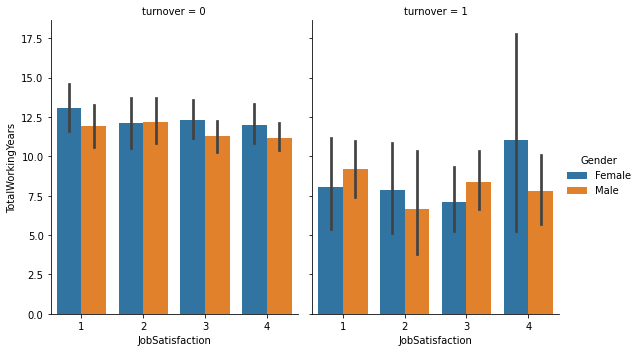

In [8]:
sns.catplot(x="JobSatisfaction",y="TotalWorkingYears", col="turnover", col_wrap=2, data=df, hue="Gender", kind="bar", aspect=.8)


**Mulheres** com *maior total de anos ne empresa* ('TotalWorkingYears') e com um *nivel de satisfação alta de trabalha* ('JobSatisfaction'), **tendem a rotatividade** ('turnover') e se *destacam consideravelmente dos homens na mesma situação*.

In [9]:
dados = df.drop(['Attrition','EmployeeCount','Over18', 'EmployeeNumber','StandardHours'], axis=1).copy() # removendo variaveis irrelevantes

# transformando variaveis 'object' em 'int'
for i in dados.columns:
    if dados[i].dtype =="object":
        dados[i]=LabelEncoder().fit_transform(dados[i])

In [40]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   BusinessTravel            1470 non-null   int32
 2   DailyRate                 1470 non-null   int64
 3   Department                1470 non-null   int32
 4   DistanceFromHome          1470 non-null   int64
 5   Education                 1470 non-null   int64
 6   EducationField            1470 non-null   int32
 7   EnvironmentSatisfaction   1470 non-null   int64
 8   Gender                    1470 non-null   int32
 9   HourlyRate                1470 non-null   int64
 10  JobInvolvement            1470 non-null   int64
 11  JobLevel                  1470 non-null   int64
 12  JobRole                   1470 non-null   int32
 13  JobSatisfaction           1470 non-null   int64
 14  MaritalStatus             1470 non-null 

In [12]:
X = dados.drop(['turnover'], axis=1)
y = dados['turnover']

x_std = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(x_std, y, random_state=10)

In [13]:
dt = DecisionTreeClassifier(random_state=10)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [14]:
from sklearn.feature_selection import RFE

# selecionando as 8 variaveis mais importantes
seletor = RFE(dt, n_features_to_select=8, step=1)
seletor = seletor.fit(X, y)
seletor.get_feature_names_out()

array(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate',
       'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike',
       'TotalWorkingYears'], dtype=object)


### Árvore de decisão

In [15]:
X = dados.drop(['turnover'], axis=1)
y = dados['turnover']

In [16]:
x_std = StandardScaler().fit_transform(X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x_std, y, random_state=10)

In [35]:
dt = DecisionTreeClassifier(random_state=10, max_depth=3)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [36]:
print('acuracia: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('precisão: {:.4f}'.format(precision_score(y_test, y_pred, average='macro')))
print('recall: {:.4f}'.format(recall_score(y_test, y_pred, average='macro')))

acuracia: 0.8315
precisão: 0.7223
recall: 0.6237


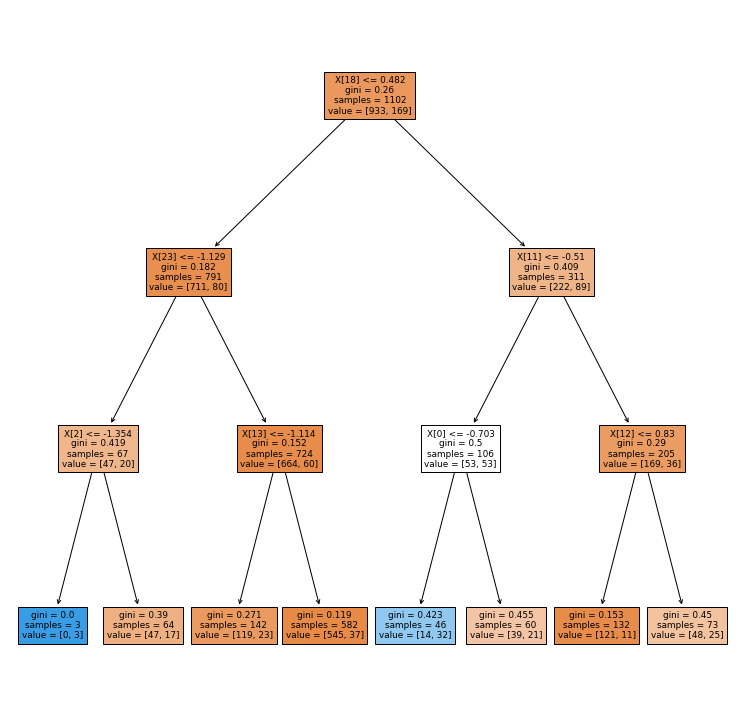

In [37]:
plt.figure(figsize = [13,13])
plot_tree(dt, filled=True)
plt.show()

Como foi definido uma profundidade maxima de 3 na construção do modelo da arvore de decisão, não será possivel a visualização completa da arvore. Mas é possivel observar que a divisão das ramificações da arvore é baseada nas variaveis mais importantes.

O indice GINI representa a impureza dos nós, variando de 0 a 1. O indice GINI é excelente para divisões binarias, quando o objetivo é obter uma previsão categorica como 'sim' ou 'não', 'verdadeiro' ou 'falso'. Já para um cenario onde os dados são continuos, o indice de GINI não será o indicado, como por exemplo previsão de preços de imoveis ou numero de carros alugados.